<a href="https://colab.research.google.com/github/aryan7905/11_Brain_Tumor_Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('brain_mri')


In [ ]:
import os

print(os.listdir('brain_mri'))



['yes', 'no', 'brain_tumor_dataset']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os


In [ ]:
data_dir = 'brain_mri'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.4586 - loss: 2.1938 - val_accuracy: 0.3400 - val_loss: 1.0827
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 849ms/step - accuracy: 0.4995 - loss: 1.0431 - val_accuracy: 0.4100 - val_loss: 1.0401
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 847ms/step - accuracy: 0.4711 - loss: 0.9388 - val_accuracy: 0.4000 - val_loss: 1.0237
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 830ms/step - accuracy: 0.4679 - loss: 0.9178 - val_accuracy: 0.3400 - val_loss: 1.1410
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 831ms/step - accuracy: 0.5426 - loss: 0.8508 - val_accuracy: 0.3100 - val_loss: 1.1161
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 751ms/step - accuracy: 0.5057 - loss: 0.8375 - val_accuracy: 0.3400 - val_loss: 1.1439
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 795ms/step - accuracy: 0.6095 - loss: 0.7672 - val_accuracy: 0.2700 - val_loss: 1.1084
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 837ms/step - accuracy: 0.5180 - loss: 0.8210 - val_accu

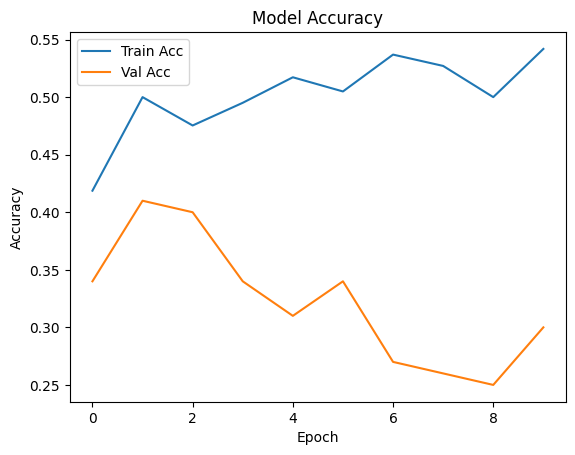

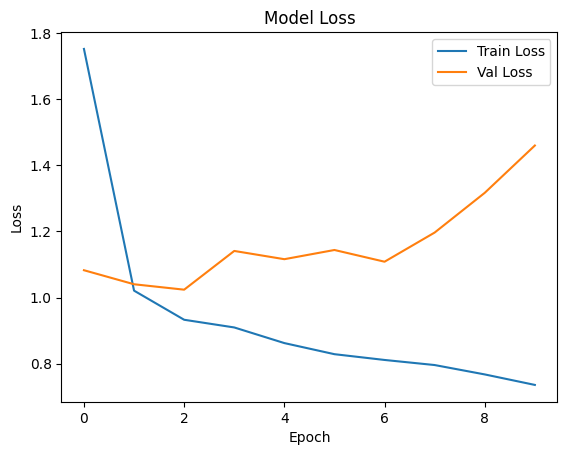

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


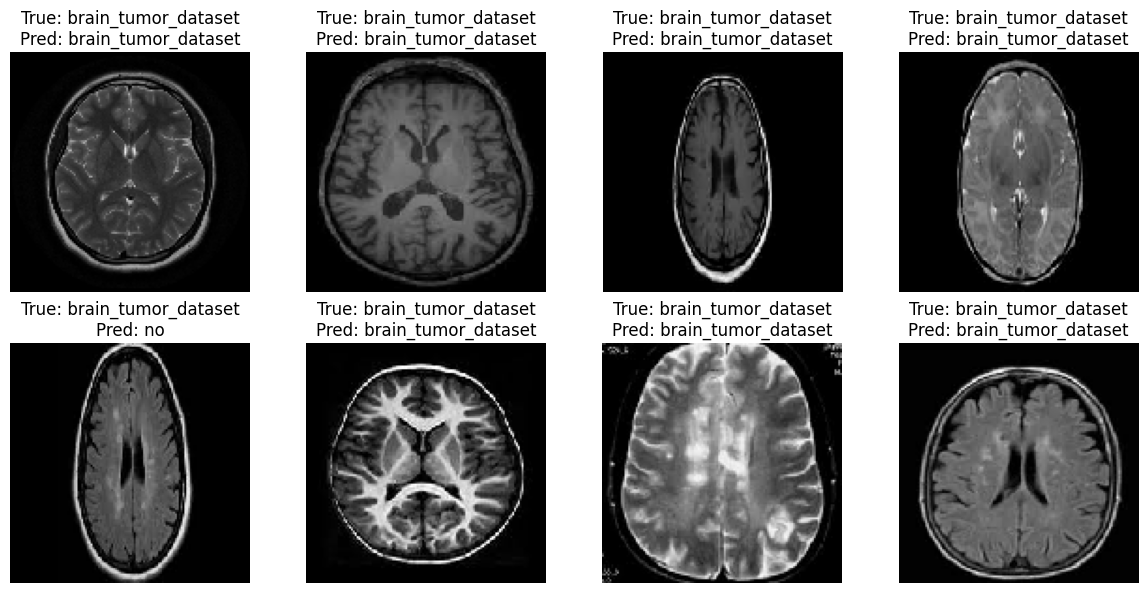

In [ ]:
x, y = next(val_gen)
preds = model.predict(x)
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x[i])
    true_label = class_names[np.argmax(y[i])]
    pred_label = class_names[np.argmax(preds[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


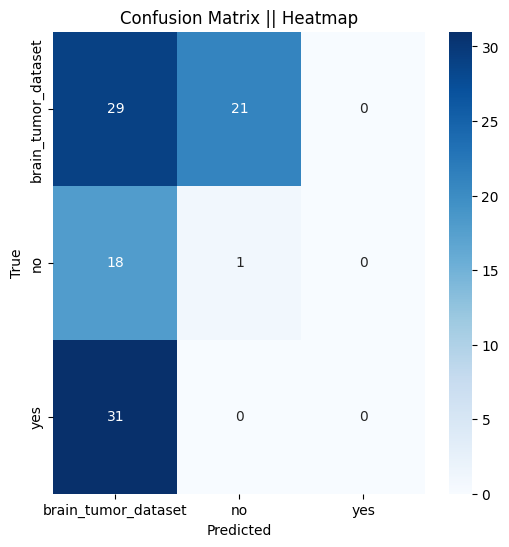

                     precision    recall  f1-score   support

brain_tumor_dataset       0.37      0.58      0.45        50
                 no       0.05      0.05      0.05        19
                yes       0.00      0.00      0.00        31

           accuracy                           0.30       100
          macro avg       0.14      0.21      0.17       100
       weighted avg       0.19      0.30      0.24       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
val_gen.reset()
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix || Heatmap')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))
